In [3]:
from Crypto.Util.number import bytes_to_long, long_to_bytes

# Prerequisites

- RSA
- Coppersmith's attacks

# Theory

**Task**:
- We are trying to improve the bound from $N^{0.25}$ to $N^{0.292}$
- We will extend the ideas of Coppersmith, Howgrave and Graham to multivariate polynomials
- We will see some new ways to construct the lattices that will help us abovementioned bound 

## Setup: Multivariate polynomials

- Check out May's thesis for more details

### Howgrave-Graham for multivariate polynomials

Let $g(x_1, x_2, ... ,x_k)$ be a polynomial in k variables with $n$ monomials (number of terms). Further, let $m$ be a positive integer. Suppose that
1. $ g(r_1, r_2, ..., r_k) = 0 \bmod  b^m$ where $|r| < R_i$ = some bound $ i = 1,...,k$
2.  $||g(r_1R_1, ..., r_kR_k)|| < \cfrac {b^m} {\sqrt{(n)}}$

Then $g(r_1, r_2, ..., r_k) = 0$ holds over the integers

## Boneh - Durfee

$$
\begin{align*}
ed & \equiv 1 \bmod (p-1)(q-1) \Rightarrow \\
ed & = 1 + k(p-1)(q-1) \iff\\
ed & = 1 + k \cdot (N - (p+q) + 1) \Rightarrow \\
0 & \equiv 1 + k \cdot (N - (p+q) + 1) \bmod  e
\end{align*}
$$  


Let $p+q = y ; \ x = k; \ A = N + 1$. So we have 
$$ f(x, y) = x(A + y) + 1 \bmod  e$$

- Remark: $p+q \approx \sqrt N; \  k < d$

Now let's consider the 2-variable case of the **Howgrave-Graham**

Let $g(x,y)$ be a polynomial in 2 variables with $n$ monomials (number of terms). Further, let $m$ be a positive integer. Suppose that
1. $ g(x_0, y_0) = 0 \bmod \ e^m$ where $|x_0| < X, \ |y_0| < Y$ = some bound $ i = 1,...,k$
2.  $\|g(xX, yY)\| < \cfrac {e^m} {\sqrt{(n)}}$

Then $g(x_0,y_0) = 0$ holds over the integers

**Task**: Since we have 2 variables we want to search for 2 polynomials $g_1(x, y), g_2(x, y)$ that satisfy the above conditions

## The search for polynomials

### Coppersmith's idea

Coppersmith proposed to tahe the two shortest vectors of the LLL reduced basis but this doesn't always yield a solution

### Boneh-Durfee idea

Boneh and Durfee proposed a new construction of the $f_i$ polynomials

for $k = 0,..., m$:
$$\begin{align*} 
g_{i,k}(x,y) &= x^i \cdot f^k(x,y) \cdot e^{m-k}  \ & \text{for}\  i \in \{0, ..,m-k\} \\
h_{j,k}(x,y) &= y^j \cdot f^k(x,y) \cdot e^{m-k} & \text{for}\  j \in \{0, ...,t\}
\end{align*}$$
These are called the **x-shifts**($g_{i,k}$) and the the **y-shifts**($h_{j,k}$)

*Remark*: 
- The determinant of the lattice mustn't exceed $e^{mn}$
- This method raised the bound to $N^{0.284}$


Example of lattice:

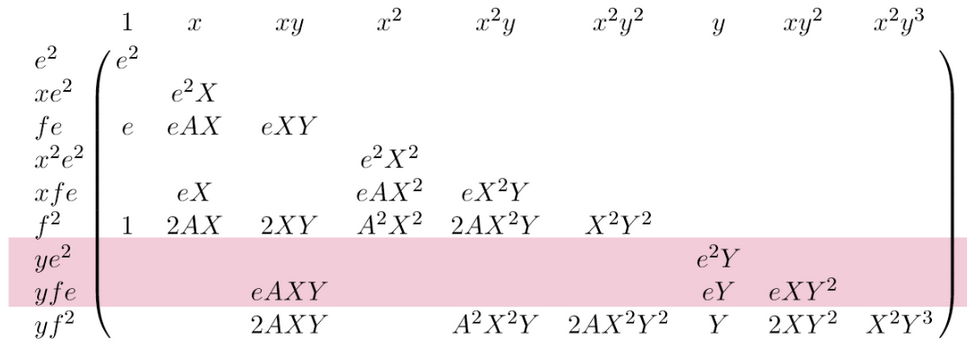
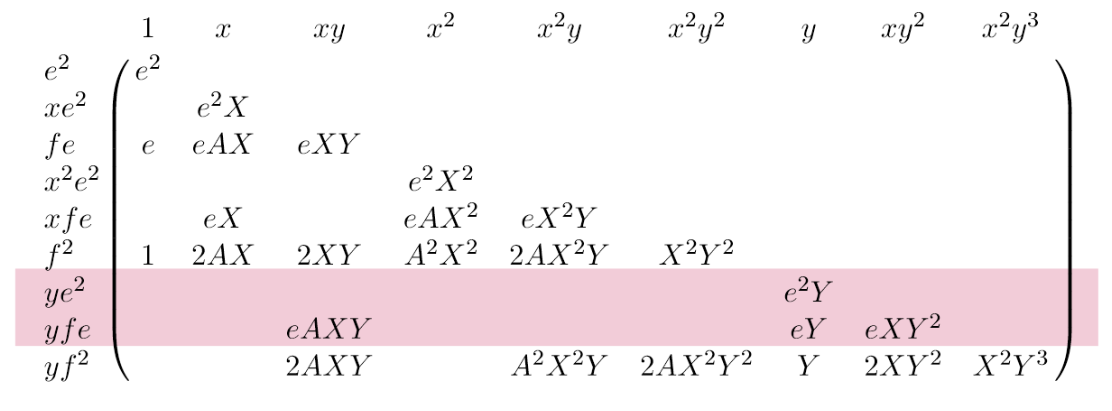

Unfortunately there are some weaknesses: 
- Some of the vectors are too big (|some of the  y-shifts| $>e^m$)
- We can remove them but
    - The lattice is no longer triangular => the upperbound becomes complicated to compute (determinant of a rectangular matrix?)
    - There are other methods to remove some of the columns to remake the matrix triangular but are way beyond our scope and have been surpassed by other advancements
- Geometrically progressive matrices are used to handle these non-triangular matrices

**Note**: To search for this term: Geometrically progressive matrices. Haven't found everything to link 

### Herrmann's and  May's idea: Unravelled Linearization

####  Linearization (Optional read for intuition)

Linear polynomials are polynomials where all the monomials have degree at most 1
- Example: $f(x_1,...,x_n) =a_1x_1+a_2x_2+...+a_nx_n$

*Idea*: Any  polynomial equation  can  be  transformed  into  a  linear  one  by  introducing  a  new  variable  for each  monomial. 

**Example**:  

$x^2 + ax + b - y = 0 \bmod \ N$. Suppose that the solutions $(x_0, y_0)$ are approximately the same size and let $X = N^\delta$ be a bound for them
- Basic linearization :
    - $\underbrace {x^2}_{u_1} + a\cdot \underbrace {x}_{u_2} + b - \underbrace {y}_{u_3} = 0 \ mod \ N $
    - We can find a solution as long as the upper bounds $U_1\cdot U_2 \cdot U_3 \leq N$ where $U_1 = N^{2\delta}, \ U_2 = N^\delta, U_3 = N^\delta$ (derived from our initial bound $X = N^\delta$ => $\delta \leq \cfrac 1 4$
- Clever linearization:
    - $\underbrace {x^2 - y}_{u_1'} + a\cdot \underbrace {x}_{u_2'} + b = 0 \bmod  N $
    - $U_1'\cdot U_2' \leq N => \delta \leq \cfrac 1 3$
    - *Inutition*: 
        - We are "hiding" the variable $y$ in $x^2$
        - The size of $u_1' \approx u_1$
        
**Remarks**:
- In  the  most  general  sense  we  speak  of  a  linearization  if  we  modify  an  initial polynomial by introducing at least one dedicated variable for a certain (nonlinear) monomial or a certain term => we do not require the resulting polynomial to be linear.
- However, an  important  requirement  for  a  useful  linearization  is, that  the  coefficients of the monomials that are subject to the linearization are up to the sign **identical or at most differ by a small factor**.  This is because differing coefficients will also be glued into the new variable and, thus, a large coefficient would dramatically increase the size of the new unknown. Example:
    - $\underbrace {x^2 - by}_{u_1'} + a\cdot \underbrace {x}_{u_2'} + b = 0 \bmod \ N $
    - Now an upper bound $U'_1$ of the new variable $u'_1$ is given by $U′_1= max(N^{2δ},N^{δ+γ})$, where $b=N^γ$.  Thus, once $γ > δ$ the coefficient will increase the size of the unknown $u′_1$ and in turn decrease the bound for $δ$.

#### Unravelled Linearization of the equation

*Idea*:
- Coppersmith abuses the algebraic relations between the variables but doesn't care about the coefficients of the polynomial
- Linearization takes the coefficients into considerations and is able to reduce the root finding problem significantly by "hiding" certain monomials but it destroys the algebraic structures involving these monomials
- We want to combine the best of the two worlds (you don't have to linearize all the way)



1. Linearize the equation and build the relations (linearize further if you need)
    $$ f(x, y) = x(A + y) + 1 = \underbrace {1 + xy}_u  + Ax \iff \bar f(u, x) = u + Ax \text{ with } xy = u-1$$

2. Construct the unraveled shift polynomials

$$
\begin{align*} 
\bar g_{i,k}(x,y) &= x^i \cdot \bar f^k(u,x) \cdot e^{m-k}  \ & \text{for}\ k \in \{0,..m\} \ i \in \{0, ..,m-k\} \\
\bar h_{j,k}(u,x,y) &= y^j \cdot \bar f^k(u,x) \cdot e^{m-k} & \text{for}\  j \in \{1, ...,t\} \ k \in \{\Big \lfloor \frac m t \Big \rfloor \cdot j, ...,m\}
\end{align*}
$$

3. We construct the lattice (with the relation $xy = u-1$ in mind)

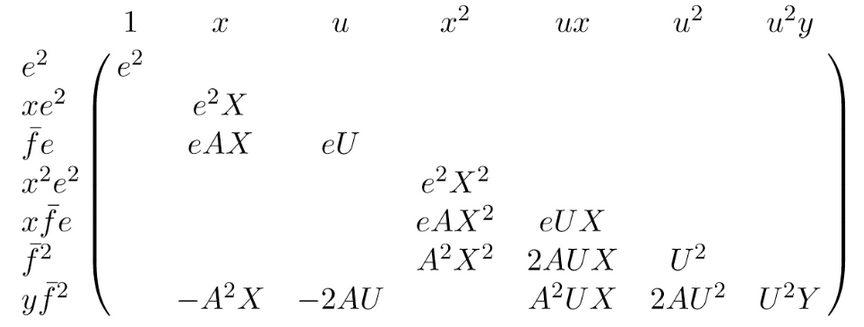

4. LLL and let's look at the new bound
    - $\|v_1\| \leq \|v_2\| \leq 2^{\frac n 4} \cdot \det(L)^{\frac 1 {n-1}}$
    - From Howgrave-Graham => $\det(L) < \cfrac {e^{m(n-1)}} {(n\cdot 2^n)^{\frac {n-1} 2}} => \det(L) < e^{mn}$
    - Fix $m,t$ s.t $\dim(L) = n$. Let $t = \tau m, \ \tau < 1$
    - Compute the determinant and the optimized dimension of the triangular matrix (won't go in to details here, check the papers linked below)
    - Woosh magic
    - for $\tau = 1-2\delta \Rightarrow \delta < \frac 1 2 (2 - \sqrt{2} \approx 0.292$



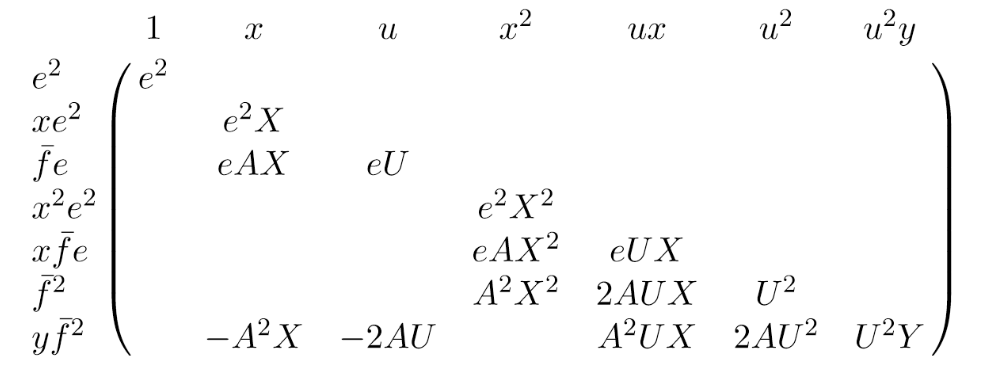

# Code

Took it from here: https://github.com/mimoo/RSA-and-LLL-attacks/blob/master/boneh_durfee.sage

In [53]:
helpful_only = True
dimension_min = 7

def helpful_vectors(BB, modulus):
    nothelpful = 0
    for ii in range(BB.dimensions()[0]):
        if BB[ii,ii] >= modulus:
            nothelpful += 1

    print (nothelpful, "/", BB.dimensions()[0], " vectors are not helpful")
# tries to remove unhelpful vectors
# we start at current = n-1 (last vector)
def remove_unhelpful(BB, monomials, bound, current):
    # end of our recursive function
    dimension_min = 7
    if current == -1 or BB.dimensions()[0] <= dimension_min:
        return BB

    # we start by checking from the end
    for ii in range(current, -1, -1):
        # if it is unhelpful:
        if BB[ii, ii] >= bound:
            affected_vectors = 0
            affected_vector_index = 0
            # let's check if it affects other vectors
            for jj in range(ii + 1, BB.dimensions()[0]):
                # if another vector is affected:
                # we increase the count
                if BB[jj, ii] != 0:
                    affected_vectors += 1
                    affected_vector_index = jj

            # level:0
            # if no other vectors end up affected
            # we remove it
            if affected_vectors == 0:
                print ("* removing unhelpful vector", ii)
                BB = BB.delete_columns([ii])
                BB = BB.delete_rows([ii])
                monomials.pop(ii)
                BB = remove_unhelpful(BB, monomials, bound, ii-1)
                return BB

            # level:1
            # if just one was affected we check
            # if it is affecting someone else
            elif affected_vectors == 1:
                affected_deeper = True
                for kk in range(affected_vector_index + 1, BB.dimensions()[0]):
                    # if it is affecting even one vector
                    # we give up on this one
                    if BB[kk, affected_vector_index] != 0:
                        affected_deeper = False
                # remove both it if no other vector was affected and
                # this helpful vector is not helpful enough
                # compared to our unhelpful one
                if affected_deeper and abs(bound - BB[affected_vector_index, affected_vector_index]) < abs(bound - BB[ii, ii]):
                    print ("* removing unhelpful vectors", ii, "and", affected_vector_index)
                    BB = BB.delete_columns([affected_vector_index, ii])
                    BB = BB.delete_rows([affected_vector_index, ii])
                    monomials.pop(affected_vector_index)
                    monomials.pop(ii)
                    BB = remove_unhelpful(BB, monomials, bound, ii-1)
                    return BB
    # nothing happened
    return BB

""" 
Returns:
* 0,0   if it fails
* -1,-1 if `strict=true`, and determinant doesn't bound
* x0,y0 the solutions of `pol`
"""
def boneh_durfee(pol, modulus, mm, tt, XX, YY):
    """
    Boneh and Durfee revisited by Herrmann and May
    
    finds a solution if:
    * d < N^delta
    * |x| < e^delta
    * |y| < e^0.5
    whenever delta < 1 - sqrt(2)/2 ~ 0.292
    """

    # substitution (Herrman and May)
    PR.<u, x, y> = PolynomialRing(ZZ)
    Q = PR.quotient(x*y + 1 - u) # u = xy + 1
    polZ = Q(pol).lift()

    UU = XX*YY + 1

    # x-shifts
    gg = []
    for kk in range(mm + 1):
        for ii in range(mm - kk + 1):
            xshift = x^ii * modulus^(mm - kk) * polZ(u, x, y)^kk
            gg.append(xshift)
    gg.sort()

    # x-shifts list of monomials
    monomials = []
    for polynomial in gg:
        for monomial in polynomial.monomials():
            if monomial not in monomials:
                monomials.append(monomial)
    monomials.sort()
    
    # y-shifts (selected by Herrman and May)
    for jj in range(1, tt + 1):
        for kk in range(floor(mm/tt) * jj, mm + 1):
            yshift = y^jj * polZ(u, x, y)^kk * modulus^(mm - kk)
            yshift = Q(yshift).lift()
            gg.append(yshift) # substitution
    
    # y-shifts list of monomials
    for jj in range(1, tt + 1):
        for kk in range(floor(mm/tt) * jj, mm + 1):
            monomials.append(u^kk * y^jj)

    # construct lattice B
    nn = len(monomials)
    BB = Matrix(ZZ, nn)
    for ii in range(nn):
        BB[ii, 0] = gg[ii](0, 0, 0)
        for jj in range(1, ii + 1):
            if monomials[jj] in gg[ii].monomials():
                BB[ii, jj] = gg[ii].monomial_coefficient(monomials[jj]) * monomials[jj](UU,XX,YY)

    # Prototype to reduce the lattice
    if helpful_only:
        # automatically remove
        BB = remove_unhelpful(BB, monomials, modulus^mm, nn-1)
        # reset dimension
        nn = BB.dimensions()[0]
        if nn == 0:
            print ("failure")
            return 0,0
    
    # check if determinant is correctly bounded
    det = BB.det()
    bound = modulus^(mm*nn)
    if det >= bound:
        print ("We do not have det < bound. Solutions might not be found.")
        print ("Try with highers m and t.")
#         if strict:
#             return -1, -1
    else:
        print ("det(L) < e^(m*n) (good! If a solution exists < N^delta, it will be found)")
        
    # LLL
    BB = BB.LLL()
    
    # transform vector i & j -> polynomials 1 & 2
    found_polynomials = False
    for pol1_idx in range(nn - 1):
        for pol2_idx in range(pol1_idx + 1, nn):
            # for i and j, create the two polynomials
            PR.<w,z> = PolynomialRing(ZZ)
            pol1 = pol2 = 0
            for jj in range(nn):
                pol1 += monomials[jj](w*z+1,w,z) * BB[pol1_idx, jj] / monomials[jj](UU,XX,YY)
                pol2 += monomials[jj](w*z+1,w,z) * BB[pol2_idx, jj] / monomials[jj](UU,XX,YY)

            # resultant
            PR.<q> = PolynomialRing(ZZ)
            rr = pol1.resultant(pol2)

            # are these good polynomials?
            if rr.is_zero() or rr.monomials() == [1]:
                continue
            else:
                print ("found them, using vectors", pol1_idx, "and", pol2_idx)
                found_polynomials = True
                break
        if found_polynomials:
            break

    if not found_polynomials:
        print ("no independant vectors could be found. This should very rarely happen...")
        return 0, 0
    
    rr = rr(q, q)

    # solutions
    soly = rr.roots()

    if len(soly) == 0:
        print ("Your prediction (delta) is too small")
        return 0, 0

    soly = soly[0][0]
    ss = pol1(q, soly)
    solx = ss.roots()[0][0]

    #
    return solx, soly


In [39]:
#Parameters for the variant solution
N = 0x665166804cd78e8197073f65f58bca14e019982245fcc7cad74535e948a4e0258b2e919bf3720968a00e5240c5e1d6b8831d8fec300d969fccec6cce11dde826d3fbe0837194f2dc64194c78379440671563c6c75267f0286d779e6d91d3e9037c642a860a894d8c45b7ed564d341501cedf260d3019234f2964ccc6c56b6de8a4f66667e9672a03f6c29d95100cdf5cb363d66f2131823a953621680300ab3a2eb51c12999b6d4249dde499055584925399f3a8c7a4a5a21f095878e80bbc772f785d2cbf70a87c6b854eb566e1e1beb7d4ac6eb46023b3dc7fdf34529a40f5fc5797f9c15c54ed4cb018c072168e9c30ca3602e00ea4047d2e5686c6eb37b9
e = 0x2c998e57bc651fe4807443dbb3e794711ca22b473d7792a64b7a326538dc528a17c79c72e425bf29937e47b2d6f6330ee5c13bfd8564b50e49132d47befd0ee2e85f4bfe2c9452d62ef838d487c099b3d7c80f14e362b3d97ca4774f1e4e851d38a4a834b077ded3d40cd20ddc45d57581beaa7b4d299da9dec8a1f361c808637238fa368e07c7d08f5654c7b2f8a90d47857e9b9c0a81a46769f6307d5a4442707afb017959d9a681fa1dc8d97565e55f02df34b04a3d0a0bf98b7798d7084db4b3f6696fa139f83ada3dc70d0b4c57bf49f530dec938096071f9c4498fdef9641dfbfe516c985b27d1748cc6ce1a4beb1381fb165a3d14f61032e0f76f095d
message = bytes_to_long(b'secret')
c = pow(message, e, N)

In [79]:
P.<x,y> = PolynomialRing(ZZ)
A = (N+1) / 2
f= 1 + x * (A+y) # mod e

delta = .292
m = 4
tau = 1-2*delta
t = int(tau * m)
X = 2*floor(N^delta)
Y = floor(N^(1/2))


In [80]:
#boneh_durfee(pol, modulus, mm, tt, XX, YY):
x_0, y_0 = boneh_durfee(f, e, m, t, X, Y)

* removing unhelpful vectors 4 and 5
* removing unhelpful vector 3
* removing unhelpful vectors 1 and 2
* removing unhelpful vector 0
We do not have det < bound. Solutions might not be found.
Try with highers m and t.
found them, using vectors 0 and 1


In [81]:
x_0, y_0

(10270082414171135071707375380729072292773770267229425172407481736410644127133039947563566289393232287134208586555589002406720764478770158587514292280868872,
 -114824927193381054653133729100762937723055136879104803858030646436847210074547168105526897691231086637427788037535995593942356193548082097530541443431726224185250130475732992922960341472367997172648296981650890419609280831706661739706571230709110116885301655355762408193516399163283330116864433873345844454325)

In [82]:
d = int(f(x_0, y_0) / e)

In [85]:
long_to_bytes(pow(c, d, N))

b'secret'

In [15]:
a = Integer(bytes_to_long(b'thesupersecretpasswordis' + bytes([0x00] * len('coppersmith'))))

In [91]:
f1 = x+y
f2 = x^2 + y
f_list = []
f_list.append(f2)
f_list.append(f1)

In [92]:
f_list.sort()

In [93]:
f_list

[x + y, x^2 + y]

# Resources

- https://youtu.be/3cicTG3zeVQ?t=1077
- https://eprint.iacr.org/2018/516.pdf
- Herrmann May paper - http://www.cits.rub.de/imperia/md/content/may/paper/pkc10_rsa_unraveled.pdf
- Another one https://www.iacr.org/archive/asiacrypt2009/59120486/59120486.pdf
- Herrman's thesis: https://pdfs.semanticscholar.org/908b/f9a601587fb7db5349c1a535aebc5712e20c.pdf
- http://www.cits.rub.de/imperia/md/content/may/paper/jochemszmay.pdf
- Alexander's may thesis https://www.math.uni-frankfurt.de/~dmst/teaching/WS2015/Vorlesung/Alex.May.pdf